<a href="https://colab.research.google.com/github/farrukhsadia790-eng/Breast-Cancer-Classification/blob/master/Breast_Cancer_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
import numpy
import matplotlib
import pandas
import sklearn



In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

**Load the Dataset**

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['ID', 'Clump_Thickess','Uniform_Cell_Size','Uniform_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df = pd.read_csv(url, names=names)

**Preprocess the data to ignore missing values**

In [4]:
df.replace('?', -99999, inplace=True)
print (df.axes)
df.drop('ID', 1, inplace=True)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['ID', 'Clump_Thickess', 'Uniform_Cell_Size', 'Uniform_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')]


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

**DataSet Visualisation**

In [ ]:
print(df.loc[0])
print(df.describe())

Clump_Thickess            5
Uniform_Cell_Size         1
Uniform_Cell_Shape        1
Marginal_Adhesion         1
Single_Epithelial_Size    2
Bare_Nuclei               1
Bland_Chromatin           3
Normal_Nucleoli           1
Mitoses                   1
Class                     2
Name: 0, dtype: object
       Clump_Thickess  Uniform_Cell_Size  ...     Mitoses       Class
count      699.000000         699.000000  ...  699.000000  699.000000
mean         4.417740           3.134478  ...    1.589413    2.689557
std          2.815741           3.051459  ...    1.715078    0.951273
min          1.000000           1.000000  ...    1.000000    2.000000
25%          2.000000           1.000000  ...    1.000000    2.000000
50%          4.000000           1.000000  ...    1.000000    2.000000
75%          6.000000           5.000000  ...    1.000000    4.000000
max         10.000000          10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


<function matplotlib.pyplot.show>

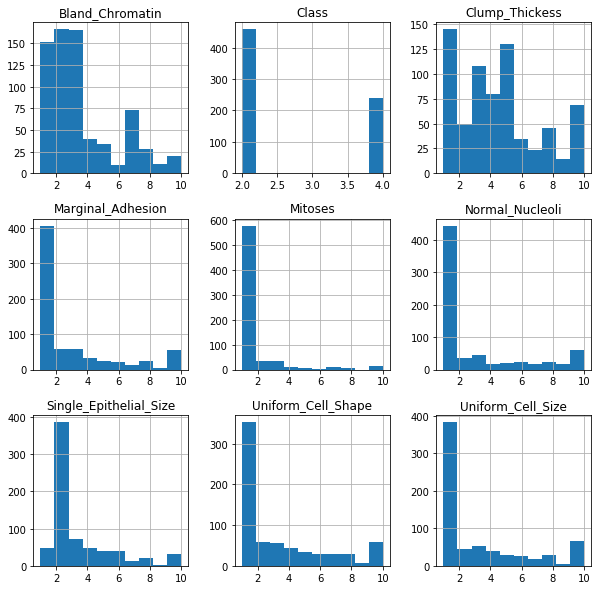

In [ ]:
df.hist(figsize=(10,10))
plt.show

**Scatter Plot Charts**

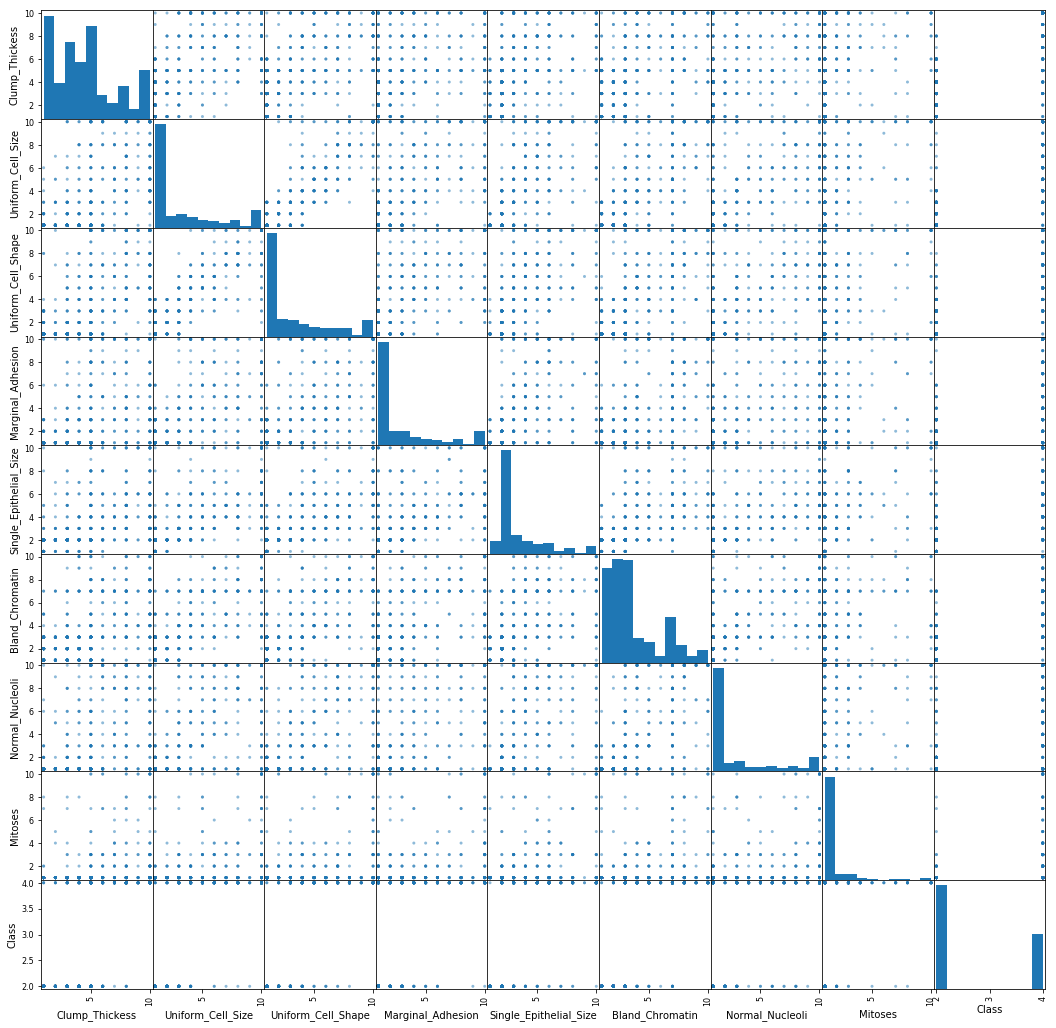

In [ ]:
scatter_matrix(df, figsize=(18,18))
plt.show()

**Create X & Y DataSets for Training**

In [ ]:
x = np.array(df.drop(['Class'],1))
y = np.array(df['Class'])
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)


**Testing Options**

In [ ]:
seed = 8
scoring = 'accuracy'

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.966006 (0.023220)
SVM: 0.955357 (0.024288)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

**Make Predictions on Data**

In [ ]:
for name, model in models:
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test,predictions))






KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        83
           4       0.96      0.96      0.96        57

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        83
           4       0.93      0.98      0.96        57

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
clf = SVC()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,2,3,2,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9642857142857143
[4]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
